# Initial Data Exploration

## Key Takeaways

- Very **imbalanced** target
- No leaky predictors

In [76]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA

In [78]:
import os
import sys

# Add library to path 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import lib.preprocessing as prep

In [79]:
# Helpful defaults
%matplotlib inline
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10

In [80]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
heads = train.loc[train['parentesco1'] == 1]
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


## Quick correlations
 If anything is highly correlated with our outcome, it may indicate leaky predictors. In this case, nothing is highly correlated, and the most extreme correlations are `Number of children 0 to 19 in household` and `average years of education for adults`, both of which logically seem like good and legit predictors of household poverty. 
 ### Positively correlated predictors to be included in the first model:
- `meaneduc` (average years of education for adults)
- `cielorazo` (=1 if the house has ceiling) - should include house-based materials
- `eviv3` (=1 if floor are good) - should include ordinal variables for quality of walls, roof, floor
- `pisomoscer` (=1 if predominant material on the floor is mosaic, ceramic, terrazo) - should do more in-depth investigation of feature engineering of housing materials. For now, the simpler quality and existence of floor features are a good start. 
### Negatively correlated predictors to be included
- `hogar_nin` (Number of children 0 to 19 in household)
- `r4t1` (persons younger than 12 years of age)
- `overcrowding` (# persons per room)
- `r4m1`/`r4h1` (Females/Males younger than 12 years of age) - for now, `r4t1` should be enough 
    - 

## Housing materials
For feature engineering, it will be helpful to know which housing materials are positively or negatively correlated with poverty

In [115]:
def correlate_vars(df, varlist):
    counts = df[varlist].sum()
    corrs = df[varlist + ['Target']].corr()['Target'].drop('Target')
    output = pd.DataFrame({'count':counts, 'correlation':corrs}).sort_values('correlation')
    return output

In [104]:
wall_vars =['paredblolad', 'paredzocalo', 
           'paredpreb', 'pareddes', 'paredmad',
           'paredzinc','paredfibras', 'paredother']
correlate_vars(train, wall_vars)

,count,correlation
paredmad,1105,-0.168237
paredpreb,1797,-0.099002
pareddes,82,-0.082923
paredzocalo,743,-0.079199
paredzinc,125,-0.051806
paredfibras,14,-0.027730
paredother,14,-0.000629
paredblolad,5677,0.261274


In [105]:
floor_vars = ['pisocemento', 'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera']
correlate_vars(train, floor_vars)

,count,correlation
pisocemento,2130,-0.205439
pisomadera,630,-0.116306
pisonotiene,157,-0.111270
pisonatur,10,-0.044957
pisoother,9,0.021219
pisomoscer,6621,0.280284


In [111]:
train.query('cielorazo == 1')[roof_vars].sum()

techozinc         6314
techoentrepiso     122
techocane           17
techootro           21
dtype: int64

In [116]:
roof_vars = ['cielorazo', 'techozinc', 'techoentrepiso', 'techocane', 'techootro']
correlate_vars(train, roof_vars)

,count,correlation
techocane,30,-0.035332
techoentrepiso,169,0.019592
techozinc,9271,0.027652
techootro,21,0.032433
cielorazo,6474,0.304421


In [107]:
water_provision_vars = ['abastaguadentro', 'abastaguafuera', 'abastaguano']
correlate_vars(train, water_provision_vars)

,count,correlation
abastaguano,34,-0.063155
abastaguafuera,303,-0.050635
abastaguadentro,9220,0.068488


In [108]:
electricity_vars = ['public', 'planpri', 'noelec', 'coopele']
correlate_vars(train, electricity_vars)

,count,correlation
noelec,21,-0.033974
planpri,3,0.000545
coopele,1059,0.002270
public,8459,0.009074


In [113]:
toilet_vars = ['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6']
correlate_vars(train, toilet_vars)

,count,correlation
sanitario5,147,-0.107332
sanitario1,37,-0.047042
sanitario3,7304,-0.046137
sanitario6,24,-0.012954
sanitario2,2045,0.088663


In [114]:
cooking_vars = ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']
correlate_vars(train, cooking_vars)

,count,correlation
energcocinar4,479,-0.162366
energcocinar3,4381,-0.082238
energcocinar1,18,-0.041694
energcocinar2,4679,0.156457


In [117]:
trash_vars = ['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6']
correlate_vars(train, trash_vars)

,count,correlation
elimbasu3,808,-0.140924
elimbasu2,287,-0.067871
elimbasu4,14,-0.041280
elimbasu6,12,0.024506
elimbasu1,8436,0.160051
elimbasu5,0,NaN


In [118]:
wall_quality = ['epared1', 'epared2', 'epared3']
correlate_vars(train, wall_quality)

,count,correlation
epared1,979,-0.203025
epared2,3129,-0.177334
epared3,5449,0.292451


In [120]:
roof_quality = ['etecho1', 'etecho2', 'etecho3']
correlate_vars(train, roof_quality)

,count,correlation
etecho1,1227,-0.190837
etecho2,2753,-0.139205
etecho3,5577,0.257378


In [121]:
floor_quality = ['eviv1', 'eviv2', 'eviv3']
correlate_vars(train, floor_quality)

,count,correlation
eviv1,966,-0.208038
eviv2,2416,-0.179421
eviv3,6175,0.294222


In [122]:
train['house_material_bad'] = train['epared1'] + train['etecho1'] + train['eviv1']
train['house_material_good'] = train['epared3'] + train['etecho3'] + train['eviv3']

In [123]:
correlate_vars(train, ['house_material_good', 'house_material_bad'])

,count,correlation
house_material_bad,3172,-0.233488
house_material_good,17201,0.320798


In [139]:
list(df.columns)

['adult',
 'r4h1_percent_in_male',
 'r4m1_percent_in_female',
 'r4h1_percent_in_total',
 'r4m1_percent_in_total',
 'r4t1_percent_in_total',
 'age_12_19',
 'escolari_age',
 'Target']

In [160]:
correlate_vars(train, ['estadocivil1', 'estadocivil2', 'estadocivil3',
     'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7',
     'parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5',
     'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10',
     'parentesco11', 'parentesco12'])

,count,correlation
estadocivil1,1317,-0.135651
parentesco6,489,-0.068125
parentesco3,3649,-0.053989
estadocivil5,600,-0.049727
estadocivil2,1178,-0.029669
...,...,...
parentesco5,91,0.016534
parentesco1,2973,0.037903
estadocivil4,305,0.054134
parentesco2,1759,0.057042


In [162]:
df = prep.feature_engineer_demographics(train, 'high')
corrs = df.corr()['Target'].sort_values().drop('Target')
print(corrs[corrs > 0.10])
print(corrs[corrs < -0.10])

estadocivil3         0.129730
escolari_age         0.147849
adult_sum            0.157167
adult_minus_child    0.159667
adult                0.176888
adult_percent        0.320388
adult_percent        0.320388
adult_mean           0.331869
Name: Target, dtype: float64
child_percent            -0.320388
r4t1_percent_in_total    -0.289337
r4h1_percent_in_male     -0.248590
r4m1_percent_in_total    -0.215471
r4m1_percent_in_female   -0.208871
                            ...   
hhsize                   -0.147642
tamhog                   -0.147642
age_12_19                -0.136906
estadocivil1             -0.135651
dis_sum                  -0.108262
Name: Target, Length: 13, dtype: float64


In [171]:
correlate_vars(train, ['hogar_nin',
 'hogar_adul',
 'hogar_mayor',
 'hogar_total'])

,count,correlation
hogar_nin,13443,-0.328199
hogar_total,38219,-0.147642
hogar_mayor,2715,-0.005159
hogar_adul,24776,0.160133


In [166]:
corrs[(corrs < -0.10) & (corrs > -0.20)]

r4h1_percent_in_total   -0.192729
female_sum              -0.175643
tamviv                  -0.158224
hhsize                  -0.147642
tamhog                  -0.147642
age_12_19               -0.136906
estadocivil1            -0.135651
dis_sum                 -0.108262
Name: Target, dtype: float64

In [159]:
df = prep.feature_engineer_age_composition(train, 'high')
corrs = df.corr()['Target'].sort_values().drop('Target')
print(corrs[corrs > 0.10])
print(corrs[corrs < -0.10])

,count,correlation
estadocivil1,1317,-0.135651
parentesco6,489,-0.068125
parentesco3,3649,-0.053989
estadocivil5,600,-0.049727
estadocivil2,1178,-0.029669
...,...,...
parentesco5,91,0.016534
parentesco1,2973,0.037903
estadocivil4,305,0.054134
parentesco2,1759,0.057042


In [167]:
list(train.select_dtypes('object').columns)

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

In [174]:
varlist = [v for v in train.columns if 'instlevel' in v]
correlate_vars(heads, varlist)

,count,correlation
instlevel2,501,-0.189209
instlevel1,129,-0.147664
instlevel3,837,-0.058061
instlevel4,514,-0.017692
instlevel6,20,0.024227
instlevel7,35,0.051864
instlevel5,353,0.062314
instlevel9,88,0.107275
instlevel8,495,0.235102


In [176]:
varlist = [v for v in train.columns if 'tipovivi' in v]
correlate_vars(heads, varlist)

,count,correlation
tipovivi4,46,-0.109057
tipovivi5,254,-0.095326
tipovivi1,1856,-0.022316
tipovivi3,537,0.032834
tipovivi2,280,0.131069


In [177]:
df = prep.feature_engineer_education(train, 'high')
corrs = df.corr()['Target'].sort_values().drop('Target')
print(corrs[corrs > 0.10])
print(corrs[corrs < -0.10])

meaneduc_sum     0.142329
instlevel8       0.214351
educ_rank        0.294792
escolari         0.302305
meaneduc         0.335070
meaneduc_mean    0.335072
Name: Target, dtype: float64
no_primary_education   -0.239661
rez_esc_scaled_sum     -0.207318
rez_esc_scaled_mean    -0.194780
rez_esc_sum            -0.194688
rez_esc_mean           -0.176427
instlevel2             -0.159210
rez_esc_escolari       -0.151775
instlevel1             -0.147883
rez_esc_scaled         -0.103809
Name: Target, dtype: float64


In [181]:
df = prep.feature_engineer_house_characteristics(train, 'high')
corrs = df.corr()['Target'].sort_values().drop('Target')
print(corrs[corrs > 0.10])
print(corrs[corrs < -0.20])
print(corrs[(corrs < -0.10) & (corrs > -0.20)])

bedrooms    0.166943
rooms_pc    0.203374
rooms       0.226208
Name: Target, dtype: float64
calc_dependency                 -0.383687
child_per_bedroom               -0.374951
child_per_room                  -0.370620
dependency_count                -0.339183
bedrooms_per_person_household   -0.281959
female_per_bedroom              -0.274250
female_per_room                 -0.273809
room_per_person_household       -0.267415
Name: Target, dtype: float64
hacdor                          -0.191714
overcrowding_room_and_bedroom   -0.184503
calc_dependency_bin             -0.180722
male_per_bedroom                -0.151780
male_per_room                   -0.150907
hacapo                          -0.138008
Name: Target, dtype: float64


In [184]:
df = prep.feature_engineer_rent(train, 'high')
corrs = df.corr()['Target'].sort_values().drop('Target')
print(corrs[corrs > 0.20])
print(corrs[(corrs > 0.10) & (corrs < 0.20)])

print(corrs[corrs < -0.20])
print(corrs[(corrs < -0.10) & (corrs > -0.20)])

rent_by_minor    0.212791
rent_by_dep      0.233662
rent_by_dep      0.233662
Name: Target, dtype: float64
rent_by_adult        0.124554
rent_per_bedroom     0.149613
rent_by_hhsize       0.152379
rent_by_rooms        0.154018
v2a1                 0.159932
rent_by_people       0.161937
rent_by_living       0.165005
tipovivi_rank        0.181519
rent_by_dep_count    0.193907
rent_by_dep_count    0.193907
Name: Target, dtype: float64
Series([], Name: Target, dtype: float64)
Series([], Name: Target, dtype: float64)


In [185]:
varlist = [v for v in train.columns if 'lugar' in v]
correlate_vars(heads, varlist)

,count,correlation
lugar3,196,-0.085646
lugar4,246,-0.084516
lugar5,275,-0.079679
lugar6,230,-0.047958
lugar2,269,-0.019746
lugar1,1757,0.175124


In [186]:
varlist = [v for v in train.columns if 'area' in v]
correlate_vars(heads, varlist)

,count,correlation
area2,845,-0.089509
area1,2128,0.089509


In [189]:
df = prep.feature_engineer_assets(train, 'high')
corrs = df.corr()['Target'].sort_values().drop('Target')
print(corrs[corrs > 0.20])
print(corrs[(corrs > 0.10) & (corrs < 0.20)])

print(corrs[corrs < -0.20])
print(corrs[(corrs < -0.10) & (corrs > -0.20)])

v18q1                          0.201754
tablet_per_person_household    0.206123
v18q                           0.238864
asset_index1                   0.243289
phone_per_person_household     0.298884
asset_index2                   0.300102
Name: Target, dtype: float64
mobilephone     0.106421
refrig          0.126792
television      0.157065
computer        0.183113
qmobilephone    0.199707
Name: Target, dtype: float64
house_utility_vulnerability   -0.305423
Name: Target, dtype: float64
Series([], Name: Target, dtype: float64)


In [9]:
# train.select_dtypes('float').columns.tolist()
corr_matrix = train.select_dtypes(exclude=['object']).corr()
print('\n negatively correlated with Target')
print(corr_matrix['Target'].sort_values()[:10])
print('\n positively correlated with Target')
print(corr_matrix['Target'].sort_values()[-10:])


 negatively correlated with Target
hogar_nin         -0.328199
r4t1              -0.316745
SQBhogar_nin      -0.311186
overcrowding      -0.289110
SQBovercrowding   -0.258744
r4m1              -0.253163
r4h1              -0.229889
eviv1             -0.208038
pisocemento       -0.205439
epared1           -0.203025
Name: Target, dtype: float64

 positively correlated with Target
SQBmeaned      0.276620
pisomoscer     0.280284
epared3        0.292451
eviv3          0.294222
SQBescolari    0.296577
escolari       0.302305
cielorazo      0.304421
meaneduc       0.335203
Target         1.000000
elimbasu5           NaN
Name: Target, dtype: float64


In [10]:
train = prep.clean_education(train)
train = prep.feature_engineer_education(train)

AttributeError: module 'lib.preprocessing' has no attribute 'clean_education'

In [50]:
df = prep.preprocess(train)

In [56]:
df5 = df.index

In [60]:
df5['testing'] = df['meaneduc']

In [59]:
df5 = pd.DataFrame(index=df.index)

In [61]:
df5.head()

,testing
0,10.0
1,12.0
2,11.0
3,11.0
4,11.0


In [53]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9547, 9548, 9549, 9550, 9551, 9552, 9553, 9554, 9555, 9556],
           dtype='int64', length=9557)

In [51]:
df.max().sort_values()

elimbasu5            0.000000e+00
parentesco5_mean     3.333333e-01
parentesco8_mean     3.333333e-01
escolari_age_std     4.437095e-01
parentesco10_mean    6.000000e-01
                         ...     
rent_by_adult        1.000000e+06
rent_by_minor        1.000000e+06
rent_by_living       1.000000e+06
rent_by_hhsize       1.176738e+06
v2a1                 2.353477e+06
Length: 243, dtype: float64

In [48]:
df.query('rez_esc_escolari < 10').rez_esc_escolari.max()

5.0

In [64]:
[c for c in train.columns if 'v2a1' in c]

['v2a1', 'v2a1_missing']

In [ ]:
## Dimensionality Reduction

In [22]:
rent_cols = [c for c in train.columns if 'rent_by' in c]
rent_cols

['rent_by_hhsize',
 'rent_by_people',
 'rent_by_rooms',
 'rent_by_living',
 'rent_by_minor',
 'rent_by_adult',
 'rent_by_dep',
 'rent_by_dep_count']

In [33]:
imputer = Imputer()
data = imputer.fit_transform(train[rent_cols])

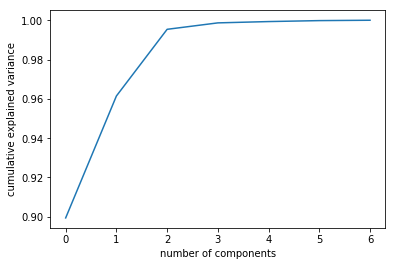

In [34]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [39]:
edu_cols = [c for c in train.columns if 'rez' in c]
edu_cols

['rez_esc',
 'rez_esc_scaled',
 'rez_esc_escolari',
 'hh_max_rez_esc',
 'hh_sum_rez_esc',
 'hh_max_rez_esc_scaled',
 'hh_sum_rez_esc_scaled',
 'hh_rez_esc_pp']

In [41]:
data = Imputer().fit_transform(train[edu_cols])

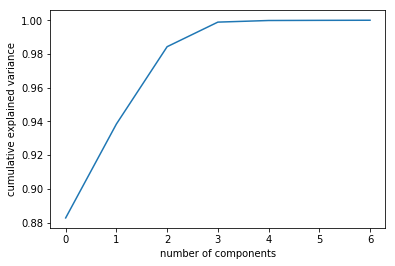

In [42]:
data = Imputer().fit_transform(train[edu_cols])
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,male_per_bedroom,female_per_bedroom,bedrooms_per_person_household,rent_by_dep,rent_by_dep_count,tablet_per_person_household,phone_per_person_household,asset_index1,asset_index2,house_utility_vulnerability
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,1.000000,0.000000,1.000000,1000000.0,inf,0.00,1.00,1,1,0
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1.000000,0.000000,1.000000,135000.0,1.350000e+05,1.00,1.00,1,2,0
2,0.0,0,8,0,1,1,0,0.0,0,0,...,0.000000,0.500000,0.500000,0.0,0.000000e+00,0.00,0.00,1,1,0
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,0.666667,0.666667,1.333333,180000.0,9.000000e+04,0.25,0.75,1,2,0
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,0.666667,0.666667,1.333333,180000.0,9.000000e+04,0.25,0.75,1,2,0


In [47]:
test1 = train.groupby('idhogar')['age'].mean()
test1.shape

(2988,)

In [53]:
def square_it(x):
    return x**2

In [49]:
test2 = train.groupby('idhogar')['age'].transform(lambda x: x.mean())
test2.shape

(9557,)

In [54]:
test3 = train.groupby('idhogar')['age'].transform(lambda x: square_it(x))
test3.shape

(9557,)

In [55]:
varlist = ['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6',
               'estadocivil7', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6',
               'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12',]


In [58]:
varlist_mean = [f'{var}_mean' for var in varlist]

In [57]:
test4 = train.groupby('idhogar')[varlist].mean()
test4.head()

,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12
idhogar,,,,,,,,,,,,,,,,,,
001ff74ca,0.500000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003123ec2,0.500000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.25,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004616164,0.000000,0.0,0.0,0.0,0.000000,0.5,0.500000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004983866,0.000000,0.0,0.0,0.0,0.000000,0.5,0.500000,0.00,0.000000,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
005905417,0.333333,0.0,0.0,0.0,0.333333,0.0,0.333333,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
test4.columns = varlist_mean

In [61]:
test4.head()

,estadocivil1_mean,estadocivil2_mean,estadocivil3_mean,estadocivil4_mean,estadocivil5_mean,estadocivil6_mean,estadocivil7_mean,parentesco2_mean,parentesco3_mean,parentesco4_mean,parentesco5_mean,parentesco6_mean,parentesco7_mean,parentesco8_mean,parentesco9_mean,parentesco10_mean,parentesco11_mean,parentesco12_mean
idhogar,,,,,,,,,,,,,,,,,,
001ff74ca,0.500000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003123ec2,0.500000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.25,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004616164,0.000000,0.0,0.0,0.0,0.000000,0.5,0.500000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004983866,0.000000,0.0,0.0,0.0,0.000000,0.5,0.500000,0.00,0.000000,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
005905417,0.333333,0.0,0.0,0.0,0.333333,0.0,0.333333,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
train.idhogar

0       21eb7fcc1
1       0e5d7a658
2       2c7317ea8
3       2b58d945f
4       2b58d945f
          ...    
9552    d6c086aa3
9553    d6c086aa3
9554    d6c086aa3
9555    d6c086aa3
9556    d6c086aa3
Name: idhogar, Length: 9557, dtype: object

In [66]:
test4.reset_index().idhogar

0       001ff74ca
1       003123ec2
2       004616164
3       004983866
4       005905417
          ...    
2983    ff9343a35
2984    ff9d5ab17
2985    ffae4a097
2986    ffe90d46f
2987    fff7d6be1
Name: idhogar, Length: 2988, dtype: object

In [75]:
test = prep.feature_engineer_relationships(train)

In [76]:
test.columns[-10]

'parentesco3_mean'

In [65]:
train.join(test4.reset_index(), on='idhogar')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [52]:
2**2

4

In [ ]:
train_set[item].groupby(train_set['idhogar']).mean()

In [12]:
train[['rez_esc_scaled', 'rez_esc_escolari', 'hh_rez_esc_pp', 'Target']].corr()

,rez_esc_scaled,rez_esc_escolari,hh_rez_esc_pp,Target
rez_esc_scaled,1.000000,0.878054,0.419330,-0.103809
rez_esc_escolari,0.878054,1.000000,0.394869,-0.103720
hh_rez_esc_pp,0.419330,0.394869,1.000000,-0.112294
Target,-0.103809,-0.103720,-0.112294,1.000000


In [51]:
train[['rez_esc', 'rez_esc_scaled', 'hh_max_rez_esc_scaled', 'hh_sum_rez_esc_scaled', 
      'hh_max_rez_esc', 'hh_sum_rez_esc']]

,rez_esc,rez_esc_scaled,hh_max_rez_esc_scaled,hh_sum_rez_esc_scaled,hh_max_rez_esc,hh_sum_rez_esc
0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,1.0,0.090909,0.090909,0.090909,1.0,1.0
4,0.0,0.000000,0.090909,0.090909,1.0,1.0
...,...,...,...,...,...,...
9552,0.0,0.000000,0.000000,0.000000,0.0,0.0
9553,0.0,-0.000000,0.000000,0.000000,0.0,0.0
9554,0.0,0.000000,0.000000,0.000000,0.0,0.0
9555,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [37]:
train['head']

KeyError: 'head'

# Distributions

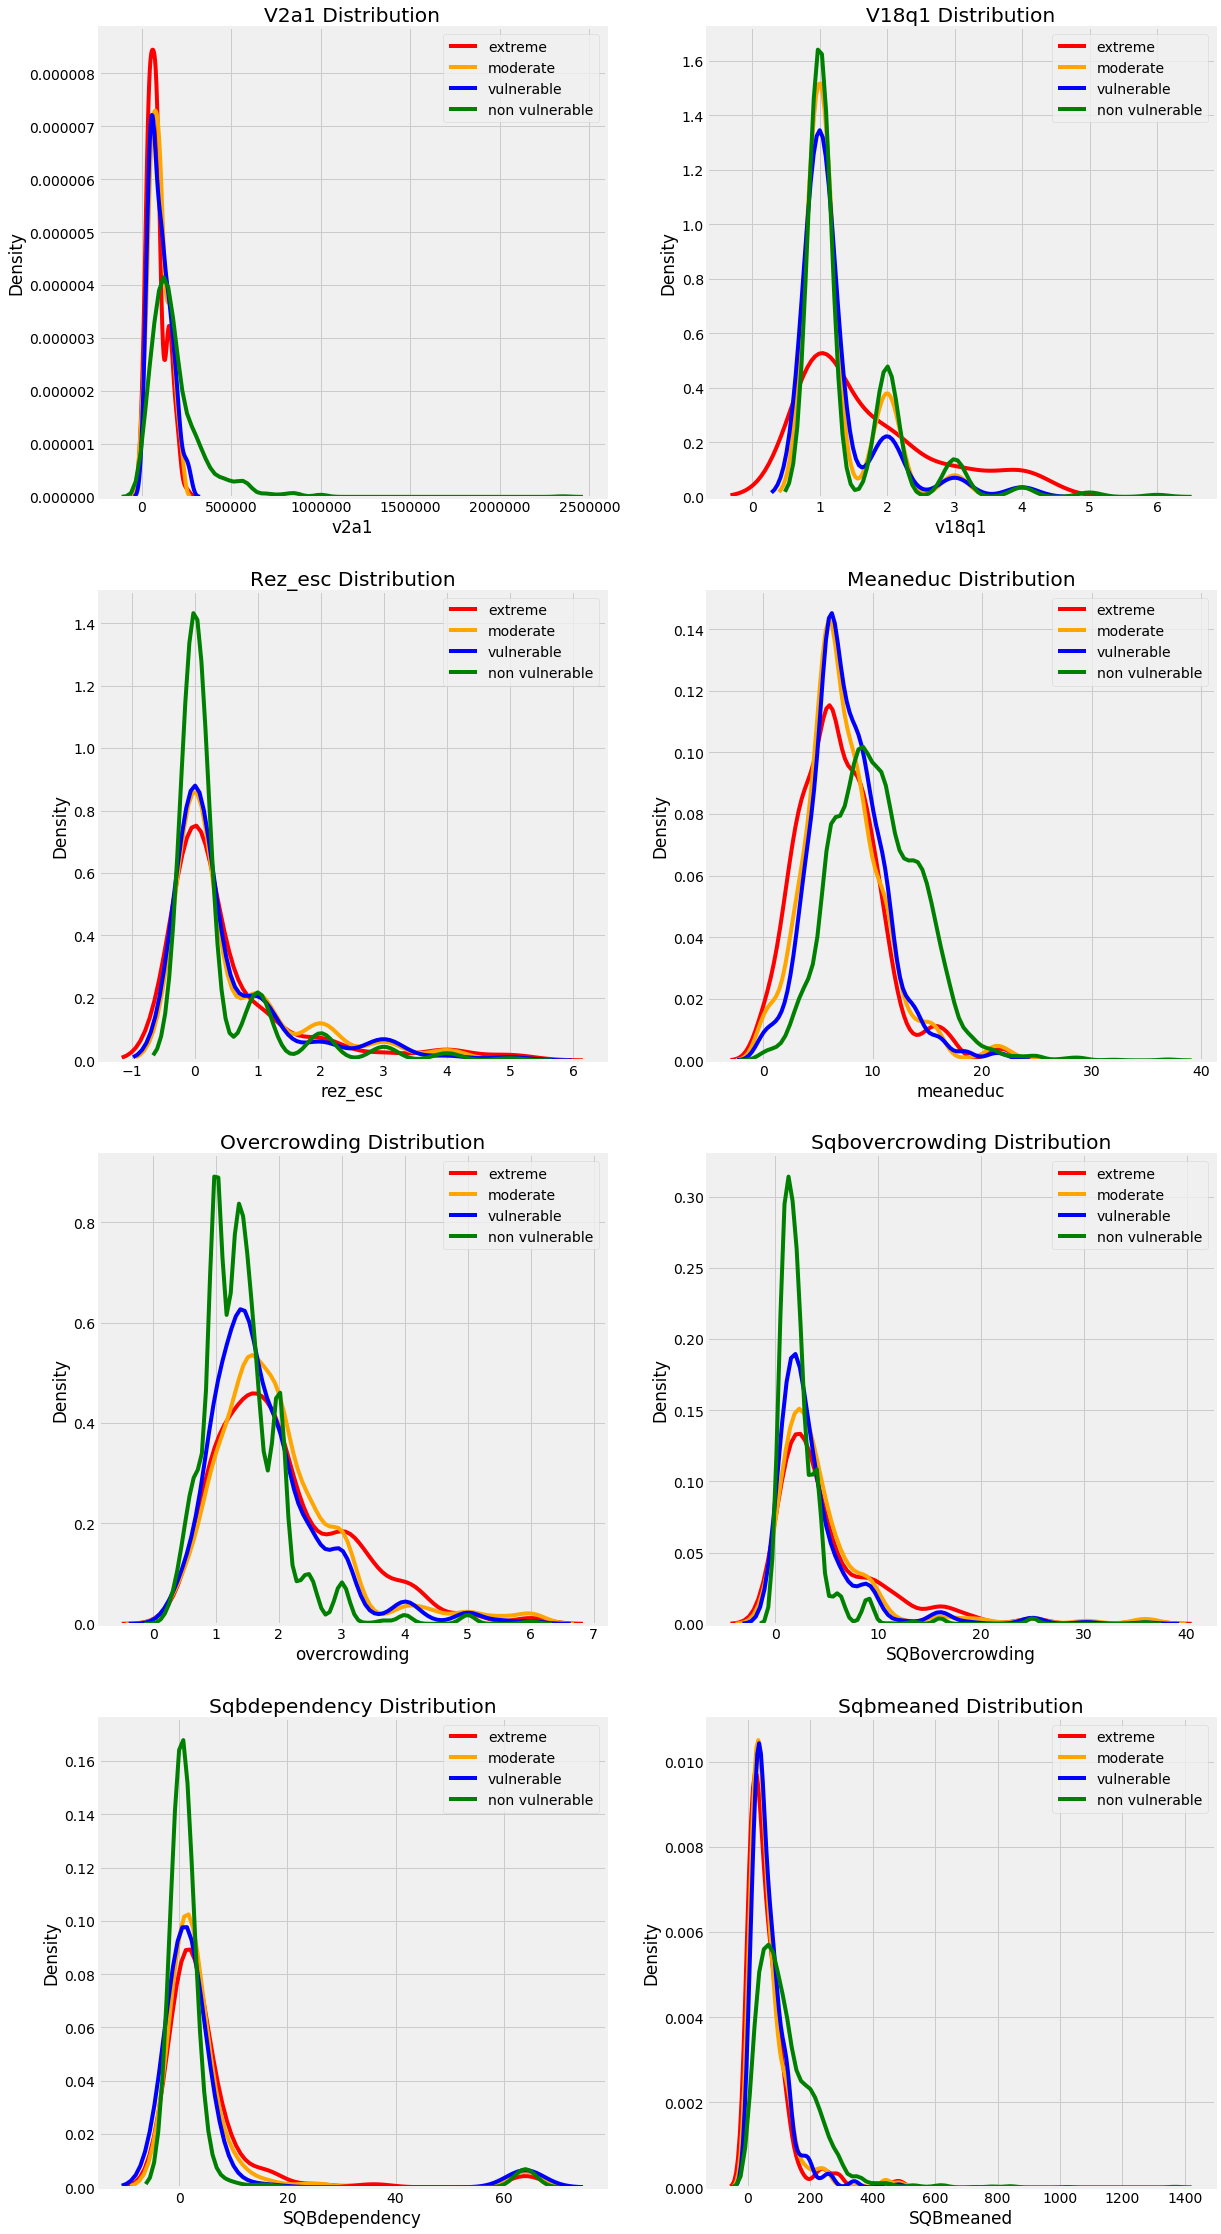

In [7]:
# https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [8]:
htypes = [x for x in heads if x.startswith('tipo')]
htypes

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

In [9]:
for t in htypes: 
    # print(pd.crosstab(heads['Target'], heads[t]))
    print(heads.groupby(['Target', t]).v2a1.mean())

Target  tipovivi1
1       0             75374.452381
        1                      NaN
2       0             94275.418605
        1                      NaN
3       0            100916.592105
        1                      NaN
4       0            194084.864600
        1                      NaN
Name: v2a1, dtype: float64
Target  tipovivi2
1       0             83077.914286
        1             36857.142857
2       0             97805.972603
        1             74450.000000
3       0            106333.232143
        1             85750.000000
4       0            156945.069705
        1            251806.295833
Name: v2a1, dtype: float64
Target  tipovivi3
1       0             36857.142857
        1             83077.914286
2       0             74450.000000
        1             97805.972603
3       0             85750.000000
        1            106333.232143
4       0            251806.295833
        1            156945.069705
Name: v2a1, dtype: float64
Target  tipovivi4
1      

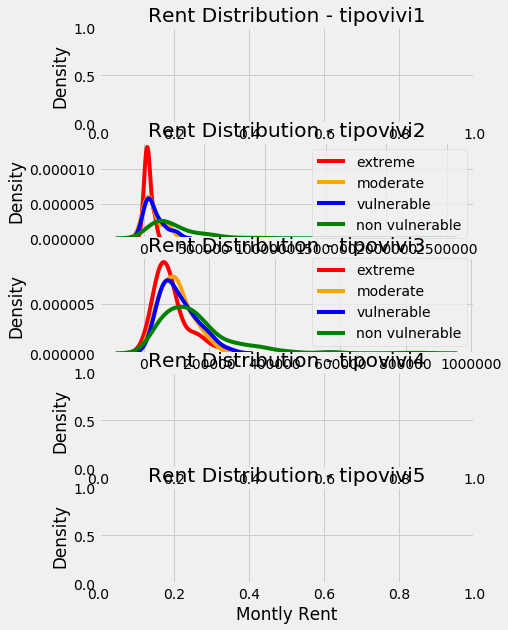

In [10]:
# Iterate through the float columns
for i, t in enumerate(htypes):
    ax = plt.subplot(5, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(heads.loc[(heads['Target'] == poverty_level) & (heads[t]), 'v2a1'].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'Rent Distribution - {t}'); plt.xlabel('Montly Rent'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

# Missingness
- `v18q1` is "number of tablets household owns" which can be filled by v18q
- `rez_esc` is "Years behind in school" which is likely more relevant to children

In [11]:
missing = train.isnull().sum()
print(f'missingness among individuals: \n {missing[missing > 0]} \n')

#See if there is missingness within head of household
# train.isnull().groupby(train['parentesco1']).sum()
missing_head = heads.loc[heads['parentesco1'] == 1].isnull().sum()
print(f'missingness among heads of hh: \n {missing_head[missing_head > 0]} \n')

missingness among individuals: 
 v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64 

missingness among heads of hh: 
 v2a1         2156
v18q1        2318
rez_esc      2972
meaneduc        3
SQBmeaned       3
dtype: int64 



In [25]:
#For an unknown reason, meaneduc is missing for some individuals, we will replace it with `escolari`
train.iloc[:10][['parentesco1', 'edjefa', 'edjefe', 'escolari', 'meaneduc']]

,parentesco1,edjefa,edjefe,escolari,meaneduc
0,1,no,10,10,10.0
1,1,no,12,12,12.0
2,1,11,no,11,11.0
3,0,no,11,9,11.0
4,0,no,11,11,11.0
5,1,no,11,11,11.0
6,0,no,11,2,11.0
7,0,no,9,0,10.0
8,1,no,9,9,10.0
9,0,no,9,11,10.0


In [ ]:
train.loc[train['meaneduc'].isnull(), 'meaneduc'] = train['escolari']

In [27]:
type(train['epared1'][1])

numpy.int64

In [28]:
train['epared1'] = train['epared1'].astype(int)

In [29]:
type(train['epared1'][1])

numpy.int32

## Dependency
### Issue: `dependency` feature is suspicious; it often does not equal the value calculated as per its stated definition. 
### Proposed solution: `calc_dependency` has a much higher correlation with the Target, so I'll use it, and re-investigate later if time permits
- `hogar_nin`, Number of children 0 to 19 in household
- `hogar_adul`, Number of adults in household
- `hogar_mayor`, # of individuals 65+ in the household
- `dependency`, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

In [16]:
# calculate dependency to see how it aligns with "yes" and "no"
train['calc_dependency'] = (train['hogar_nin'] + train['hogar_mayor']) / train['hogar_adul']

In [34]:
#Make sure 0 and 'no' always match
print(train.query('calc_dependency == 0').dependency.value_counts())
print(train.query('dependency == "no"').calc_dependency.value_counts())

no    1747
Name: dependency, dtype: int64
0.0    1747
Name: calc_dependency, dtype: int64


In [35]:
print(train.query('dependency == "yes"').calc_dependency.value_counts())

1.000000    1632
0.500000     368
0.666667     120
0.750000      54
0.600000      18
Name: calc_dependency, dtype: int64


In [36]:
train.query('calc_dependency == 1').dependency.value_counts()

yes          1632
8             337
2             102
1.5            70
3              28
1.3333334      28
Name: dependency, dtype: int64

In [28]:
testdf = train.loc[(train['dependency'] != 'yes') & (train['dependency'] != 'no')]
testdf['dependency'] = testdf.dependency.astype(np.float64)
testdf['dependency_dif'] = testdf['calc_dependency'] - testdf['dependency']

c:\users\zrankin\appdata\local\continuum\miniconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\zrankin\appdata\local\continuum\miniconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


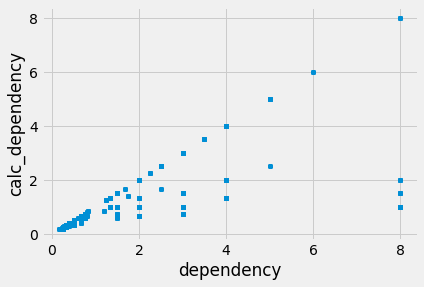

In [38]:
testdf.plot.scatter('dependency', 'calc_dependency')

In [40]:
testdf[['Target', 'dependency', 'calc_dependency']].corr()

,Target,dependency,calc_dependency
Target,1.000000,-0.170376,-0.439809
dependency,-0.170376,1.000000,0.456504
calc_dependency,-0.439809,0.456504,1.000000


## Housing Quality/Composition

### Directionality - 
- `cielorazo` is the only backwards one
(also, coincidentally, the strongest correlation with Target)

### Features
- sanitario1, =1 no toilet in the dwelling
- pisonotiene, =1 if no floor at the household
- cielorazo, =1 if the house has ceiling
- abastaguano, =1 if no water provision
- noelec, =1 no electricity in the dwelling
- sanitario1, =1 no toilet in the dwelling

In [70]:
# Check the directionality of the binary variables before making composite indices
binaries = ['sanitario1', 'pisonotiene', 'cielorazo', 'abastaguano', 'noelec', 'sanitario1']
def create_housing_index(df):
    df['house_vulnerability_index'] = (df['sanitario1'] +
                         df['pisonotiene'] +
                         (df['cielorazo'] == 0) +
                         df['abastaguano'] + 
                         df['noelec'] + 
                         df['sanitario1'])
    return df

train = create_housing_index(train)
train[binaries + ["house_vulnerability_index", "Target"]].corr()['Target']



sanitario1                  -0.047042
pisonotiene                 -0.111270
cielorazo                    0.304421
abastaguano                 -0.063155
noelec                      -0.033974
sanitario1                  -0.047042
house_vulnerability_index   -0.305423
Target                       1.000000
Name: Target, dtype: float64

## Education
- escolari, years of schooling
- rez_esc, Years behind in school

### create features
- 
- mean

In [76]:
# NOTE - rez_esc is only defined for children in these ages
train.query('age >= 7 & age <= 17').rez_esc.isnull().sum()

1

In [87]:
train['rez_esc_scaled'] = train['rez_esc'] / (train['age'] - 6)

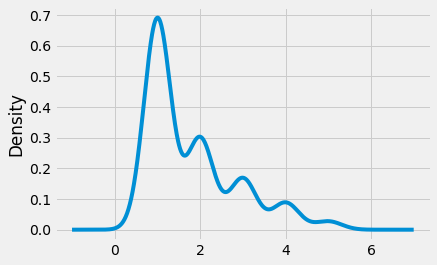

In [86]:
train.query('rez_esc > 0').rez_esc.plot.kde()

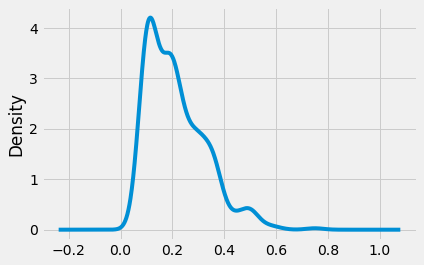

In [88]:
train.query('rez_esc > 0').rez_esc_scaled.plot.kde()

In [ ]:
lambda x: (x - x.mean()) / x.std()

In [96]:
# In [81]: zscore = lambda x: (x - x.mean()) / x.std()

transformed = train.groupby('idhogar')['rez_esc_scaled'].max()

In [126]:
# take_max = lambda x: x.max()
# take_mean = lambda x: x.max()
# def take_max(x):
#     return x.max()

train['hh_max_rez_esc_scaled'] = train.groupby('idhogar')['rez_esc_scaled'].transform(lambda x: x.max())
# train['hh_mean_esc_scaled'] = train.groupby('idhogar')['rez_esc_scaled'].transform(mean)


In [115]:
len(transformed)

9557

In [124]:
print(len(transformed))
transformed.head()

9557


0         NaN
1         NaN
2         NaN
3    0.090909
4    0.090909
Name: rez_esc_scaled, dtype: float64

In [100]:
train['testing'] = transformed

In [102]:
train['testing'].value_counts()

Series([], Name: testing, dtype: int64)

In [125]:
train[["rez_esc_scaled", "hh_rez_esc_scaled", "rez_esc", "Target"]].corr()['Target']

rez_esc_scaled      -0.118581
hh_rez_esc_scaled   -0.200386
rez_esc             -0.099357
Target               1.000000
Name: Target, dtype: float64

In [106]:
len(train)

9557

# Check data types

In [30]:
train.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [81]:
missing_rez_esc = train.query('age >= 7 & age <= 17').rez_esc.isnull()

In [83]:
train.query('age >= 7 & age <= 17').loc[missing_rez_esc]['age']

2514    10
Name: age, dtype: int64

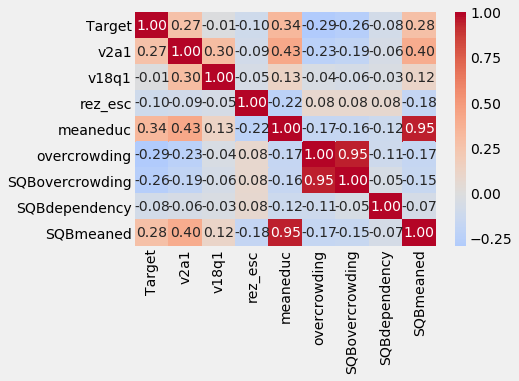

In [118]:
corr_matrix =train[['Target'] + train.select_dtypes('float').columns.tolist()].corr()
sns.heatmap(corr_matrix,annot=True, fmt = ".2f", cmap = "coolwarm", center=0)

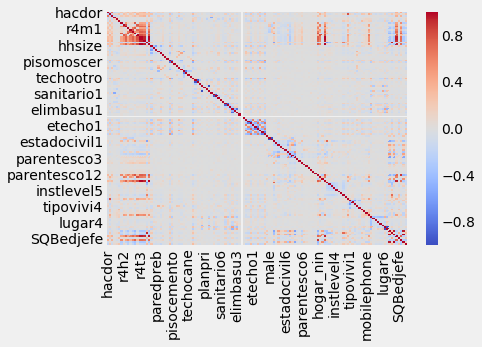

In [126]:
corr_matrix = train.select_dtypes('int64').corr()
sns.heatmap(corr_matrix, cmap = "coolwarm", center=0)

In [129]:
corr_matrix['Target'].sort_values()

hogar_nin      -0.328199
r4t1           -0.316745
SQBhogar_nin   -0.311186
r4m1           -0.253163
r4h1           -0.229889
                  ...   
SQBescolari     0.296577
escolari        0.302305
cielorazo       0.304421
Target          1.000000
elimbasu5            NaN
Name: Target, Length: 130, dtype: float64